The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir 
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

### Data Fields
**Elevation** - Elevation in meters<br>
**Aspect** - Aspect in degrees azimuth<br>
**Slope** - Slope in degrees<br>
**Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features<br>
**Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features<br>
**Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway<br>
**Hillshade_9am (0 to 255 index)** - Hillshade index at 9am, summer solstice<br>
**Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice<br>
**Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice<br>
**Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points<br>
**Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)** - Wilderness area designation<br>
**Soil_Type (40 binary columns, 0 = absence or 1 = presence)** - Soil Type designation<br>
**Cover_Type (7 types, integers 1 to 7)** - Forest Cover Type designation<br>

#### The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

#### The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder
from sklearn.metrics import auc, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import warnings
from lightgbm  import LGBMClassifier
from mlxtend.classifier import StackingCVClassifier

In [9]:
names = ["LogisticRegression","Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "Gradient Boosting Classifer"]

classifiers = [
        LogisticRegression(solver='lbfgs', max_iter=1000),
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1,max_iter=500),
        AdaBoostClassifier(),
        GaussianNB(),
        GradientBoostingClassifier(max_depth=5)]



## Import Data

In [10]:
train_o = pd.read_csv('train.csv')
test_o = pd.read_csv('test.csv')
train = train_o.copy()
test = test_o.copy()

In [11]:
train.columns.tolist()

['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

## Evaluation

In [12]:
def CV_accuracy(clf, X, y):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    scores = np.mean(scores)
    print(f'Cross-Validation Accuracy: {scores}')

## Individual Class

In [13]:
def stone_level(df):
# 0 = unknown, 1 = rubbly, 2 = stony, 3 = very stony, 4 = extremely stony


    stone_level = [4, 3, 1, 1, 1, 2, 0, 0, 3, 1, 
               1, 2, 1, 0, 0, 0, 0, 3, 0, 0, 
               0, 4, 0, 4, 4, 3, 4, 4, 4, 4, 
               4, 4, 4, 4, 1, 4, 4, 4, 4, 4]
    df['Stone_level'] = sum(i*df[f'Soil_Type{i}'] for i in np.arange(1,41))
    
    df['Stone_level'] = df['Stone_level'].replace(np.arange(1,41), stone_level)
    
    return df

In [14]:
# sns.scatterplot(data=train, x='Cover_Type', y='Hillshade_Noon' )

## Scale Columns

<font color=red>Without scaling seems to have better score</font>

In [15]:
# std_col = ['Elevation', 'Aspect', 'Slope',
#        'Horizontal_Distance_To_Hydrology',
#        'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
#        'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
# cat_col = [i for i in train.columns if i not in std_col]
# cat_col.remove('Id')
# cat_col.pop(-1)

In [16]:
# def col_scaler(df):
#     for i in std_col:
#         df[i] = pd.to_numeric(df[i],downcast='float')
#         df[i]= MinMaxScaler().fit_transform(df[i].values.reshape(-1,1))
#     c = 'Vertical_Distance_To_Hydrology'
#     df[c] = pd.to_numeric(df[c], downcast='float')
#     df[c] = StandardScaler().fit_transform(df[c].values.reshape(-1,1))
     

In [17]:
# col_scaler(train)

## Feature Engineering

In [18]:
def dist_feature(df):
    three_dist = ['Horizontal_Distance_To_Hydrology',
                  'Horizontal_Distance_To_Roadways',
                  'Horizontal_Distance_To_Fire_Points']
    df['3H_dist_sum'] = df[three_dist].sum(axis=1)
    df['3H_dist_mean'] = df[three_dist].mean(axis=1)
    df['Hydro_Road_Sum'] = df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Roadways']
    df['Hydro_Road_diff_abs'] = abs(df['Horizontal_Distance_To_Hydrology'] - df['Horizontal_Distance_To_Roadways'])
    df['Hydro_Fire_Sum'] = df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Fire_Points']
    df['Hydro_Fire_diff_abs'] = abs(df['Horizontal_Distance_To_Hydrology'] - df['Horizontal_Distance_To_Fire_Points'])
    df['Road_Fire_Sum'] = df['Horizontal_Distance_To_Roadways'] + df['Horizontal_Distance_To_Fire_Points']
    df['Road_Fire_diff_abs'] = abs(df['Horizontal_Distance_To_Roadways'] - df['Horizontal_Distance_To_Fire_Points'])
    
    return df

In [19]:
def hillshade_features(df):
    hillshade_cols=['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']
    df['N-9_Hillshade'] = df['Hillshade_Noon'] - df['Hillshade_9am']
    df['3-N_Hillshade'] = df['Hillshade_3pm'] - df['Hillshade_Noon']
    df['3-9_Hillshade'] = df['Hillshade_3pm'] - df['Hillshade_9am']
    df['N+9_Hillshade'] = df['Hillshade_Noon'] + df['Hillshade_9am']
    df['3+N_Hillshade'] = df['Hillshade_3pm'] + df['Hillshade_Noon']
    df['3+9_Hillshade'] = df['Hillshade_3pm'] + df['Hillshade_9am']
    df['Hillshade_sum'] = df[hillshade_cols].sum(axis=1)
    df['Hillshade_mean'] = df[hillshade_cols].mean(axis=1)
    df['Hillshade_max'] = df[hillshade_cols].max(axis=1)
    df['Hillshade_min'] = df[hillshade_cols].min(axis=1)
    df['9+N_Avg'] = (df['Hillshade_9am'] + df['Hillshade_Noon']) /2
    df['N+3_Avg'] = (df['Hillshade_Noon'] + df['Hillshade_3pm']) /2
    return df

In [20]:
def mod_features(df):
    df['Elevation2'] = df['Elevation'] **2
    df['Elev_Hydro_Diff'] = df['Elevation'] - df['Vertical_Distance_To_Hydrology']
    df['Aspect_sin'] = np.sin(np.radians(df['Aspect']))
    df['Aspect_cos'] = np.cos(np.radians(df['Aspect']))
#     df['hyp'] = df['Elevation'] / np.sin(np.radians(df['Slope'])+0.0001) ## have inf for 5 data
    df['Dist_to_Hydrology'] = np.sqrt(df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)
    df['Slope_Hydro'] = df['Vertical_Distance_To_Hydrology'] /(df['Horizontal_Distance_To_Hydrology'] + 0.001)
    df['Slope_Hydro_sin'] = np.sin(np.radians(df['Slope_Hydro']))
    df['Slope_Hydro_cos'] = np.cos(np.radians(df['Slope_Hydro']))

    stone_level(df)
    dist_feature(df)
    return df

In [21]:
train = train_o.copy()
test = test_o.copy()

df = mod_features(train)
test = mod_features(test)

## Separate X and y

In [23]:
cols_to_remove = ['Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type14',
                  'Soil_Type15','Elevation2','Slope_Hydro_sin','3H_dist_mean']
print('df:',len(df.columns), 'test:', len(test.columns))
df = df.drop(cols_to_remove,axis=1)
test = test.drop(cols_to_remove, axis=1)
print('df:',len(df.columns), 'test:', len(test.columns))


df: 73 test: 72
df: 68 test: 67


In [24]:
col_remove = ['Id','Cover_Type']
y_train= df['Cover_Type']
X_train = df.drop(col_remove, axis=1)


test.head()
test_id = test['Id']
X_test = test.drop('Id', axis=1)


In [25]:
gaussian_mix = GaussianMixture(n_components=15, random_state=42)
gaussian_mix.fit(X_test)

X_train['Gaussian_mix'] = gaussian_mix.predict(X_train)
X_test['Gaussian_mix'] = gaussian_mix.predict(X_test)

In [26]:

print('X: ',len(X_train.columns))
print("Test: ",len(X_test.columns))
print(f'Do training set and testing set have the same number of columns: {len(X_train.columns) == len(X_test.columns)}')

X:  67
Test:  67
Do training set and testing set have the same number of columns: True


# Training

### Split Training and Validation Set

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Creation

In [30]:
knn = KNeighborsClassifier(n_jobs = -1, n_neighbors = 1)
etc = ExtraTreesClassifier(n_estimators = 500, max_depth =50,max_features = 30, random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
lgc = LGBMClassifier(n_estimators=400, num_leaves=100, verbosity=0, random_state=42, n_jobs=-1)
rfc = RandomForestClassifier(n_estimators=300, min_samples_leaf=1, random_state=42, n_jobs=-1)
abc = AdaBoostClassifier(n_estimators=200, 
                         base_estimator=DecisionTreeClassifier(min_samples_leaf=2, random_state=42),
                         random_state=42)
xbc = xgb.XGBClassifier(learning_rate=0.1, n_estimators=300, 
                           max_depth=15, random_state=42, n_jobs=-1)

ensemble=[('KNN',knn),
          ('Ada', abc),
          ('ExtraTree', etc),
#           ('Random Forest', rfc),
          ('LGBM', lgc)
         ]
#           ('GradientB', gbc),
#           ('xboost', xbc),

In [31]:
stack  = StackingCVClassifier(classifiers=[clf for Name, clf in ensemble],
                              meta_classifier= lgc,
                              cv=5, 
                              use_probas=True,
                              use_features_in_secondary= True,
                              drop_last_proba= False,
                              verbose=1,
                              random_state=42,
                              n_jobs=-1
                              )

In [32]:
stack.fit(X_train,y_train)

Fitting 5 classifiers...
Fitting classifier1: kneighborsclassifier (1/5)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier2: adaboostclassifier (2/5)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier3: extratreesclassifier (3/5)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   48.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier4: randomforestclassifier (4/5)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier5: lgbmclassifier (5/5)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.0min finished


StackingCVClassifier(classifiers=[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform'), AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gin...ilent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
        verbosity=0)],
           cv=5, drop_last_proba=False,
           meta_classifier=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=400, n_jobs=-1, num_leaves=100, objective=None,
        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
        verbosity=0),
           n_jobs=-1, pre_dispatch='2*n_jobs', random_state=42

In [34]:
single_clf= lgc.fit(X_train,y_train)

In [46]:
predictions = stack.predict(X_test)
result = pd.DataFrame({'Id': test_id,
                       'Cover_Type': predictions})
result.to_csv('./submission_stack4.csv', index=False, line_terminator='\n')

In [ ]:
scores = cross_val_score(stack, X,y, cv=5, scoring='accuracy', verbose=1)
print(f"Accuracy: {scores.mean():.4f}")

In [36]:
feats = pd.Series(data=single_clf.feature_importances_, index=X_train.columns)
feats_sort = feats.sort_values(ascending=False)
feats.head()

Elevation                           16712
Aspect                               8160
Slope                                7731
Horizontal_Distance_To_Hydrology     6616
Vertical_Distance_To_Hydrology       9272
dtype: int32

In [37]:
feats.values

array([16712,  8160,  7731,  6616,  9272,  8863,  9375, 10221,  9161,
        9363,   986,   359,  1153,   357,   132,   487,   350,   608,
         137,   365,  1138,   379,   254,   345,   107,   462,     5,
          26,   300,     0,   361,   260,   341,     0,    41,     0,
           0,   522,   425,   387,   531,   483,    77,    63,     0,
           0,   394,   273,    68,     0, 18792,  8157,  9773,  7467,
        7489,     0,  6655,  2460,  9934,     0,  9988, 12173, 11573,
       11610, 10523, 17326,  3957])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 <a list of 67 Text xticklabel objects>)

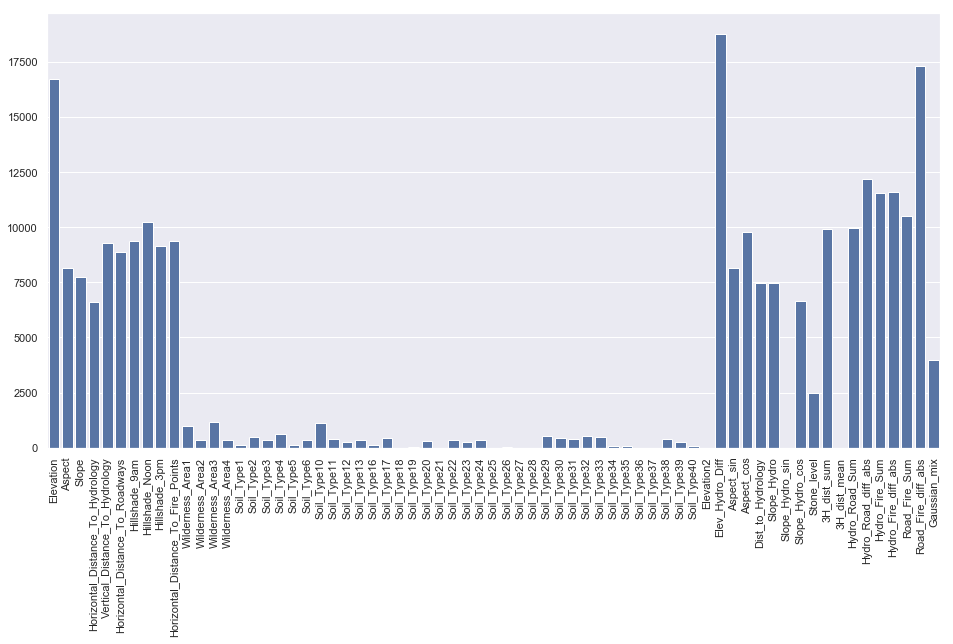

In [38]:
sns.set(rc={'figure.figsize':(16,8)})
bp = sns.barplot(x= feats.index, y=feats.values, color='b')
plt.xticks(rotation=90)

In [45]:
non_important_feats = feats[feats == 0]
non_important_feats.index.tolist()

['Soil_Type21',
 'Soil_Type25',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type36',
 'Soil_Type37',
 'Elevation2',
 'Slope_Hydro_sin',
 '3H_dist_mean']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

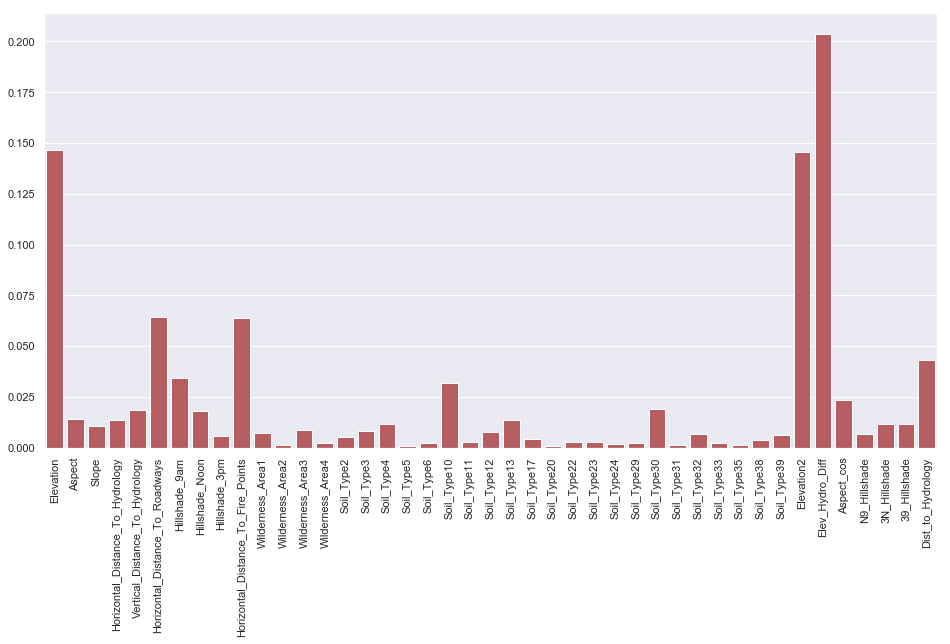

In [216]:
f_feats = feats[feats > 0.001]
bp = sns.barplot(x= f_feats.index, y=f_feats.values, color='r')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

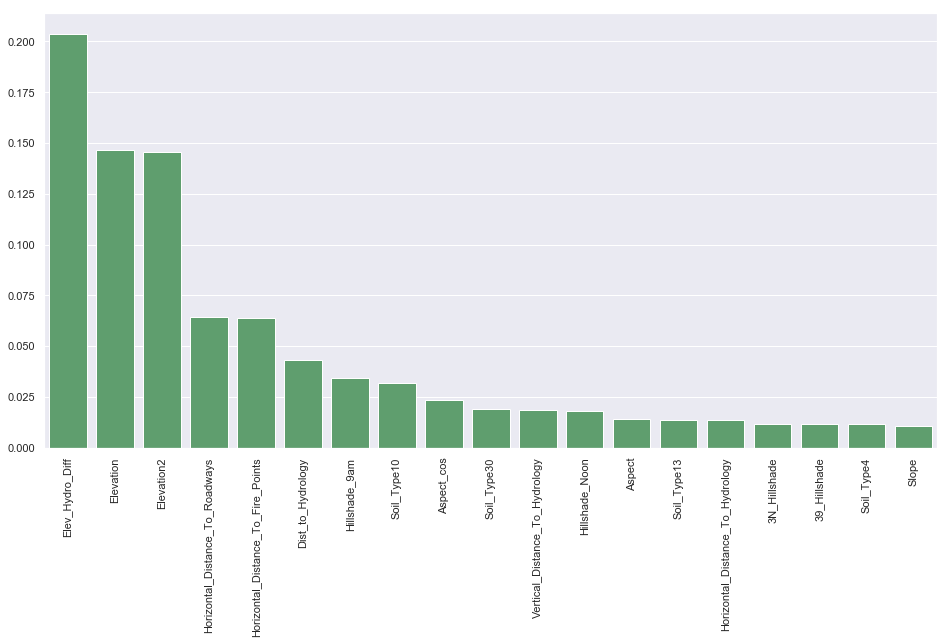

In [217]:
fs_feats = feats[feats > 0.01]
fs_feats = fs_feats.sort_values(ascending=False)
bp = sns.barplot(x= fs_feats.index, y=fs_feats.values, color='g')
plt.xticks(rotation=90)

In [135]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_pred)

1.1091269841269842

In [23]:
learning_rate = [0.1, 0.15, 0.2]
n_estimators = [100, 200, 300]
max_depth = [5, 10, 15]
param_grid = dict(learning_rate= learning_rate, n_estimators=n_estimators, max_depth=max_depth)

In [24]:
grid_search = GridSearchCV(xboost, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv= 3, verbose=1)
grid_result = grid_search.fit(X, y)

print(grid_result.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 58.2min finished


{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 300}


In [ ]:
xboost = xgb.XGBClassifier(learning_rate=0.1, n_estimators=300, max_depth=15, random_state=42)
xboost.fit(X,y)

In [ ]:
xgb_bestparam = xboost(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'],
                                           learning_rate = grid_result.best_params_['learning_rate'])

CV_accuracy(xgb_bestparam,X,y)
xgb_bestparam.fit(X,y)
prediction = xgb_bestparam.predict(test)
result = pd.DataFrame({'Id': test_id,
                       'Cover_Type': prediction})
result.to_csv('./submission_xgb.csv', index=False,line_terminator='\n')

In [ ]:
grid_search = GridSearchCV(rfc, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv= 5, verbose=0)
grid_result = grid_search.fit(X_train, y_train)

print(grid_result.best_params_)

rfc_bestparam = RandomForestClassifier(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'])

CV_accuracy(gbc_bestparam,X,y)


rfc_bestparam.fit(X,y)
predictions = rfc_bestparam.predict(test)
result = pd.DataFrame({'Id': test_id,
                       'Cover_Type': predictions})
result.to_csv('./submission_rfc.csv', index=False,line_terminator='\n')

train.describe()

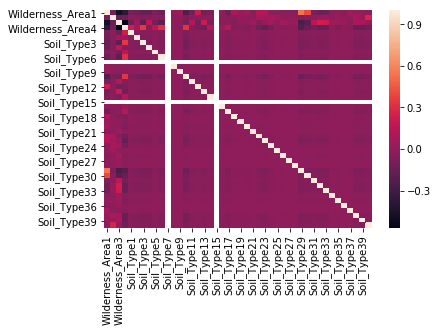

In [59]:
gbc

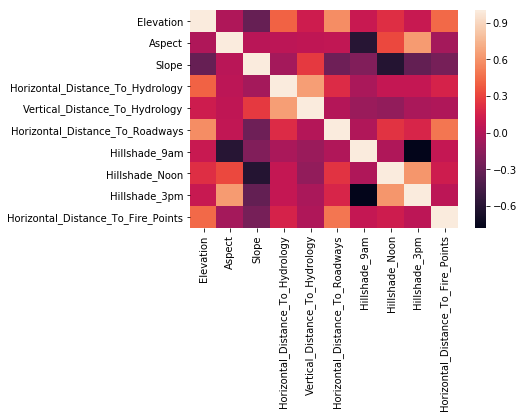

In [62]:
sns.heatmap(train[std_col].corr())

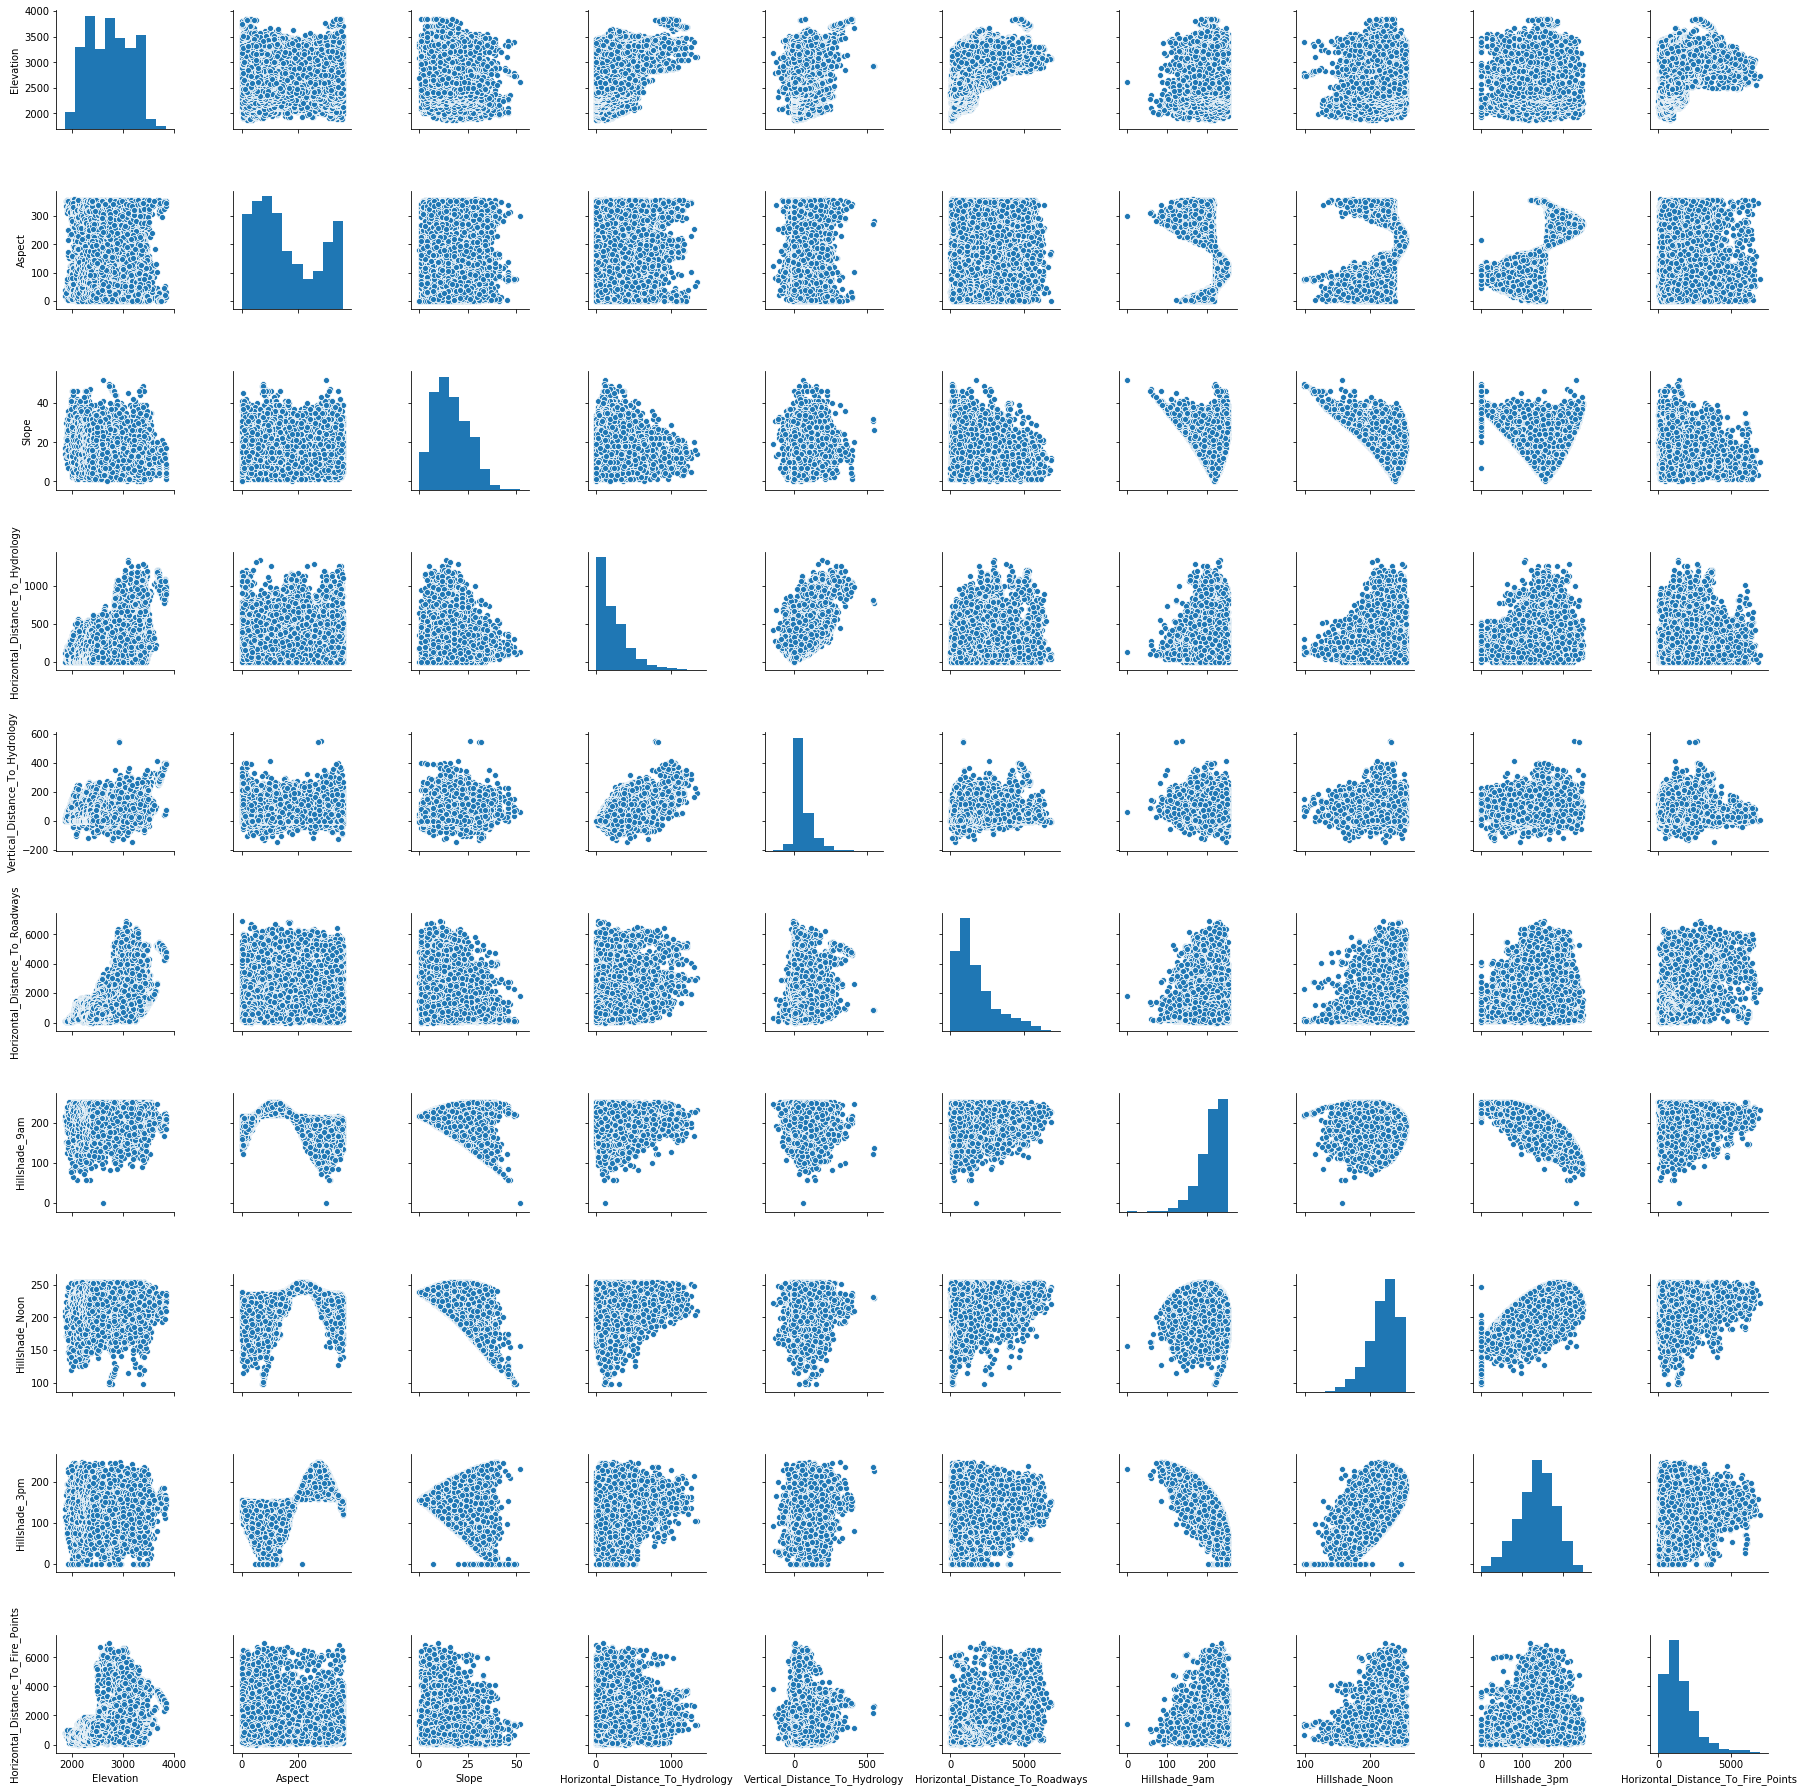

In [61]:
sns.pairplot(train[std_col])
plt.show()

In [15]:
test['Soil_Type15'].describe()

count    565892.000000
mean          0.000005
std           0.002302
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Soil_Type15, dtype: float64

In [ ]:
df = train[std_col] + train['Cover_Type']
df.head()

C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\cptien\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


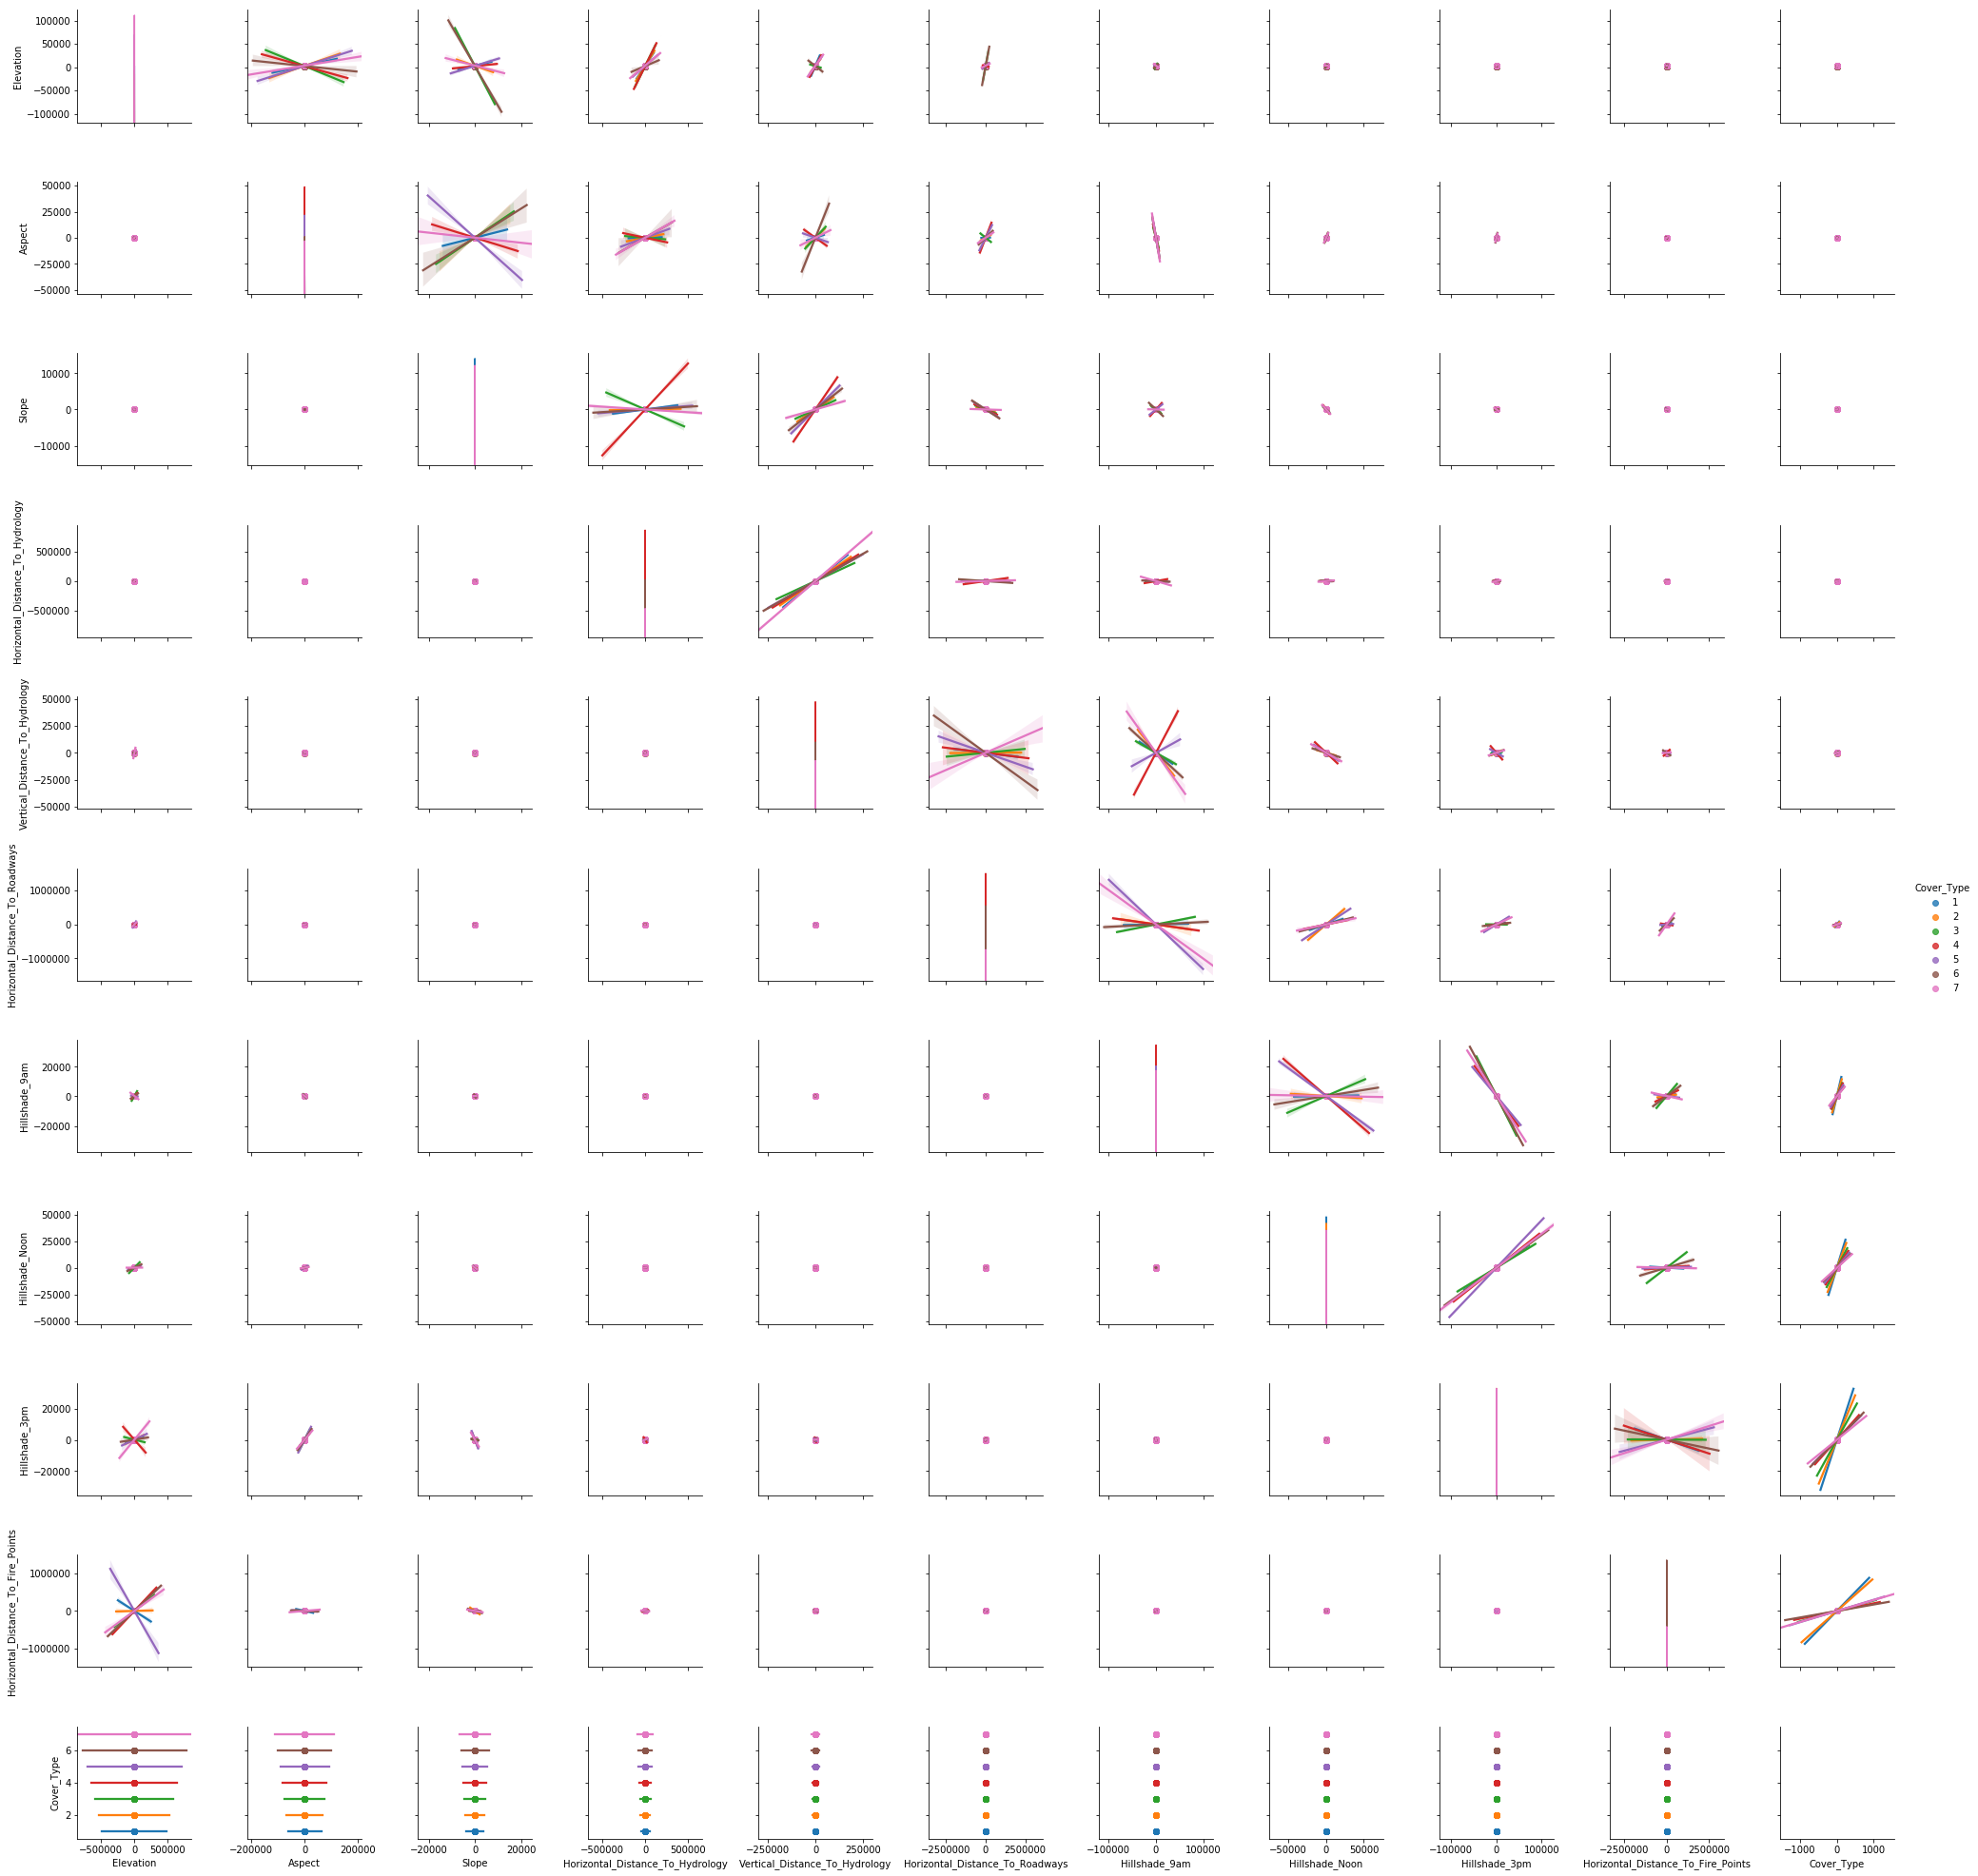

In [13]:
sns.pairplot(df,kind='reg', hue='Cover_Type')

In [85]:
def cv_score(X_train, y_train, X_val, y_val):
#     obj_features, num_features = feature_list(df)
    names = ["LogisticRegression","Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "Gradient Boosting Classifer"]

    classifiers = [
        LogisticRegression(),
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1,max_iter=500),
        AdaBoostClassifier(),
        GaussianNB(),
        GradientBoostingClassifier(max_depth=5)]
    print("==========================")
    print("Cross Validation")
    print("==========================")

    for name, clf in zip(names, classifiers):
        cv_score = cross_val_score(clf, X_train, y_train,cv=5).mean()
        print(f'{name}: {cv_score}')

    print()
    print("====================")
    print()

    print("==========================")
    print("ROC_AUC_SCORE using validation set")
    print("==========================")
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        roc_score = roc_auc_score(y_val, y_pred)
        print(f'{name}: {roc_score}')

## Figures

In [271]:
train = train_o.copy()


In [272]:
train['Dist_to_Hydrology'] = np.sqrt(train['Horizontal_Distance_To_Hydrology']**2 + train['Vertical_Distance_To_Hydrology']**2)


### Hydrology

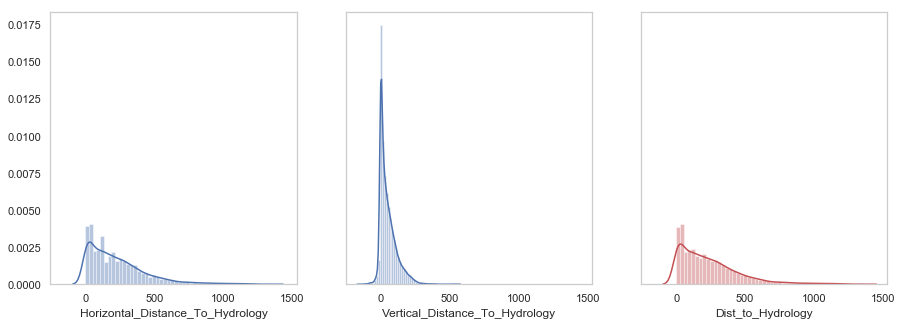

In [288]:
sns.set_style("whitegrid", {'axes.grid' : False})

f, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
sns.distplot(train['Horizontal_Distance_To_Hydrology'], ax= axes[0])
sns.distplot(train['Vertical_Distance_To_Hydrology'], ax= axes[1])
sns.distplot(train['Dist_to_Hydrology'], color= 'r', ax= axes[2])


In [292]:
train[['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology','Dist_to_Hydrology']].kurt()

Horizontal_Distance_To_Hydrology    2.803984
Vertical_Distance_To_Hydrology      3.403499
Dist_to_Hydrology                   2.667020
dtype: float64

### Hillshade

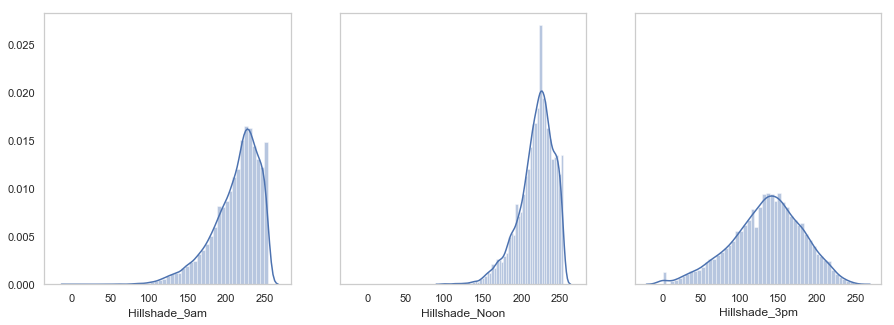

In [290]:
f, axes = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
sns.distplot(train['Hillshade_9am'], ax= axes[0])
sns.distplot(train['Hillshade_Noon'], ax= axes[1])
sns.distplot(train['Hillshade_3pm'], ax= axes[2])

In [291]:
train[['Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm']].kurt()

Hillshade_9am     1.218810
Hillshade_Noon    1.153484
Hillshade_3pm    -0.087344
dtype: float64

### Elevation

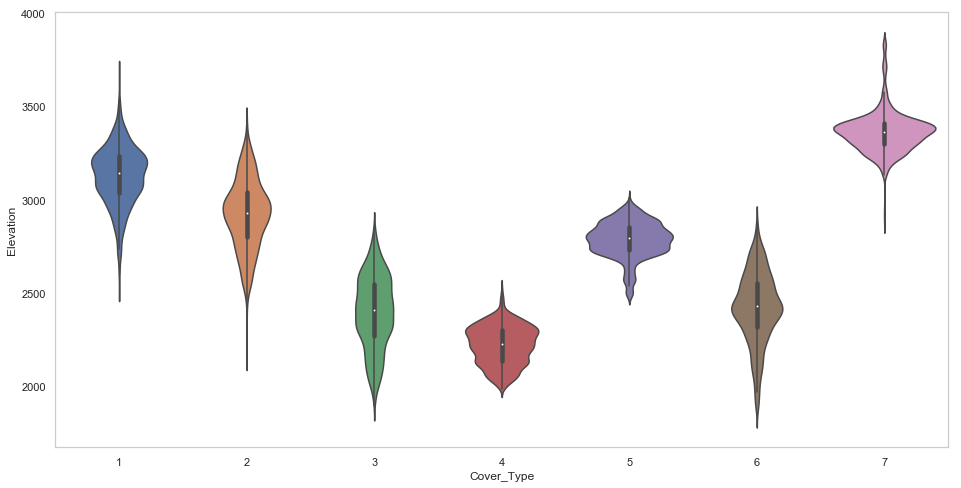

In [294]:
sns.violinplot(x='Cover_Type',y = 'Elevation', data=train)

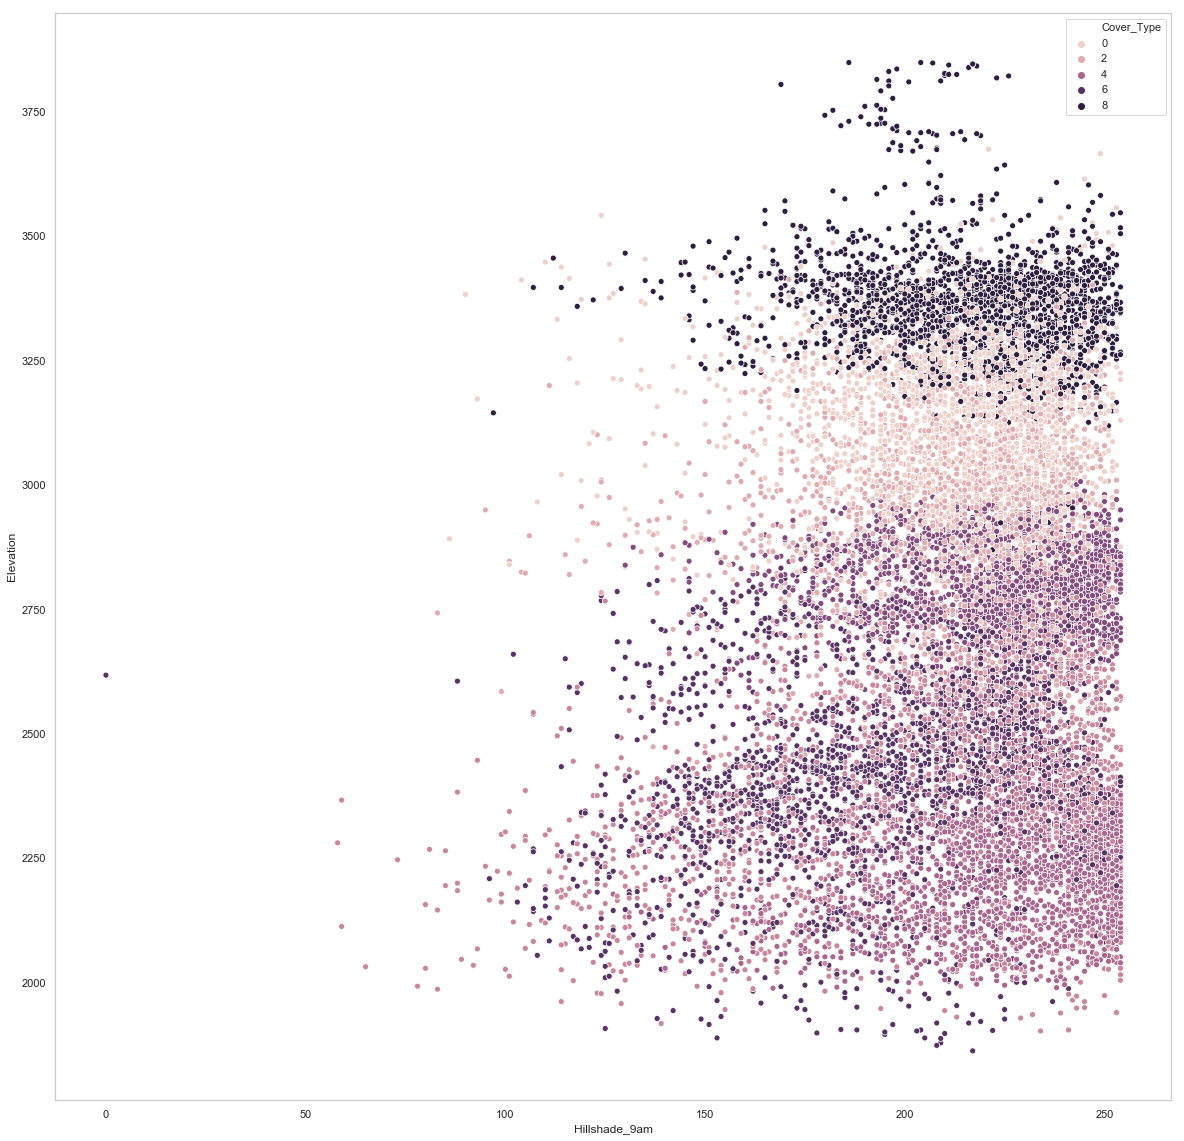

In [305]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=train, x='Hillshade_9am', y='Elevation', hue='Cover_Type')

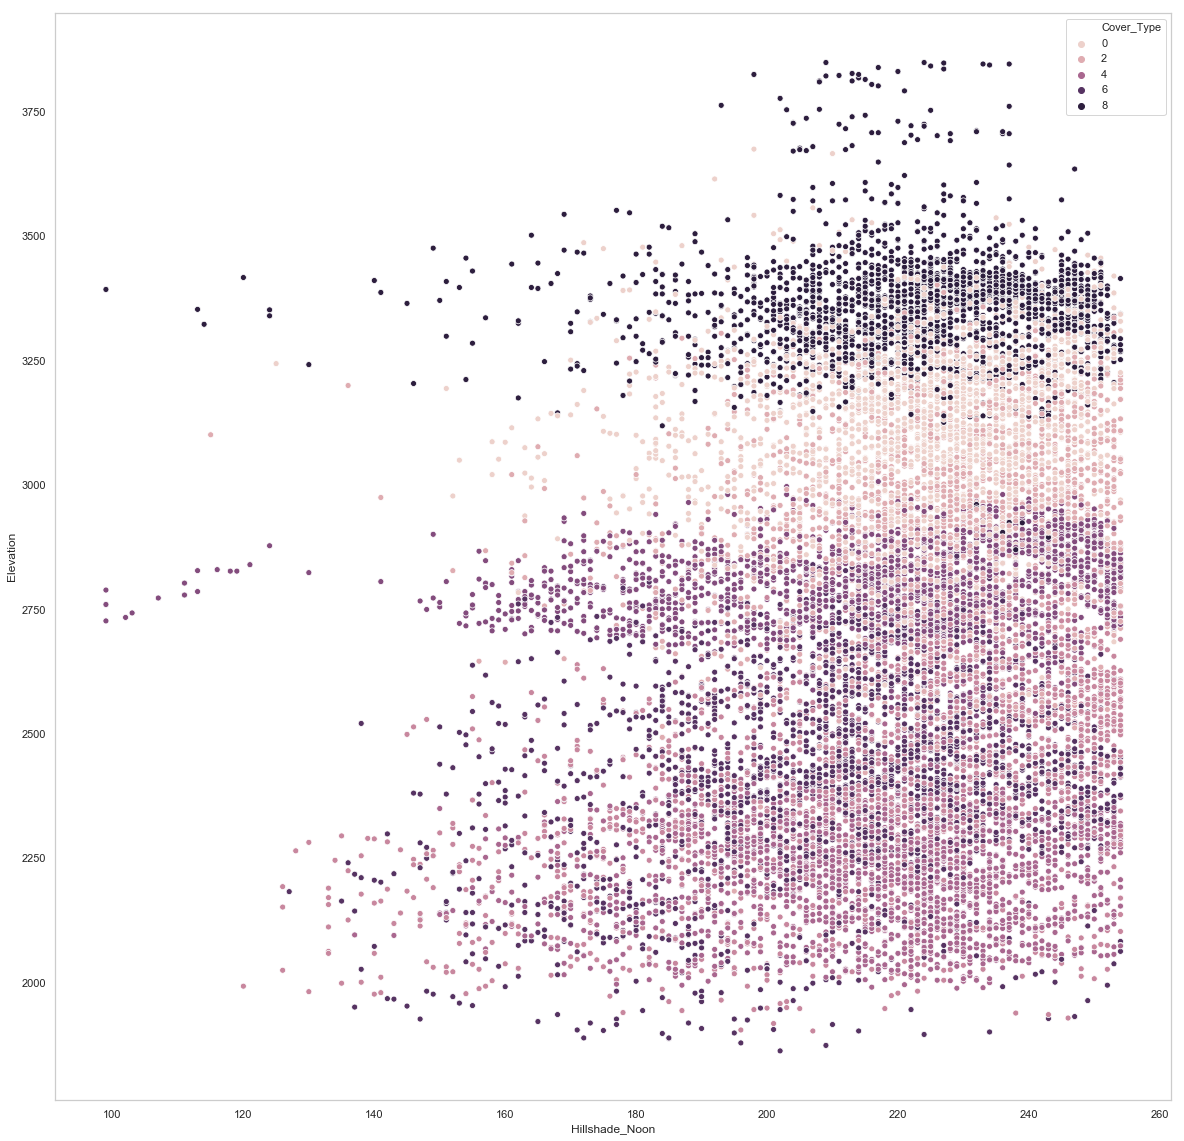

In [302]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=train, x='Hillshade_Noon', y='Elevation', hue='Cover_Type')

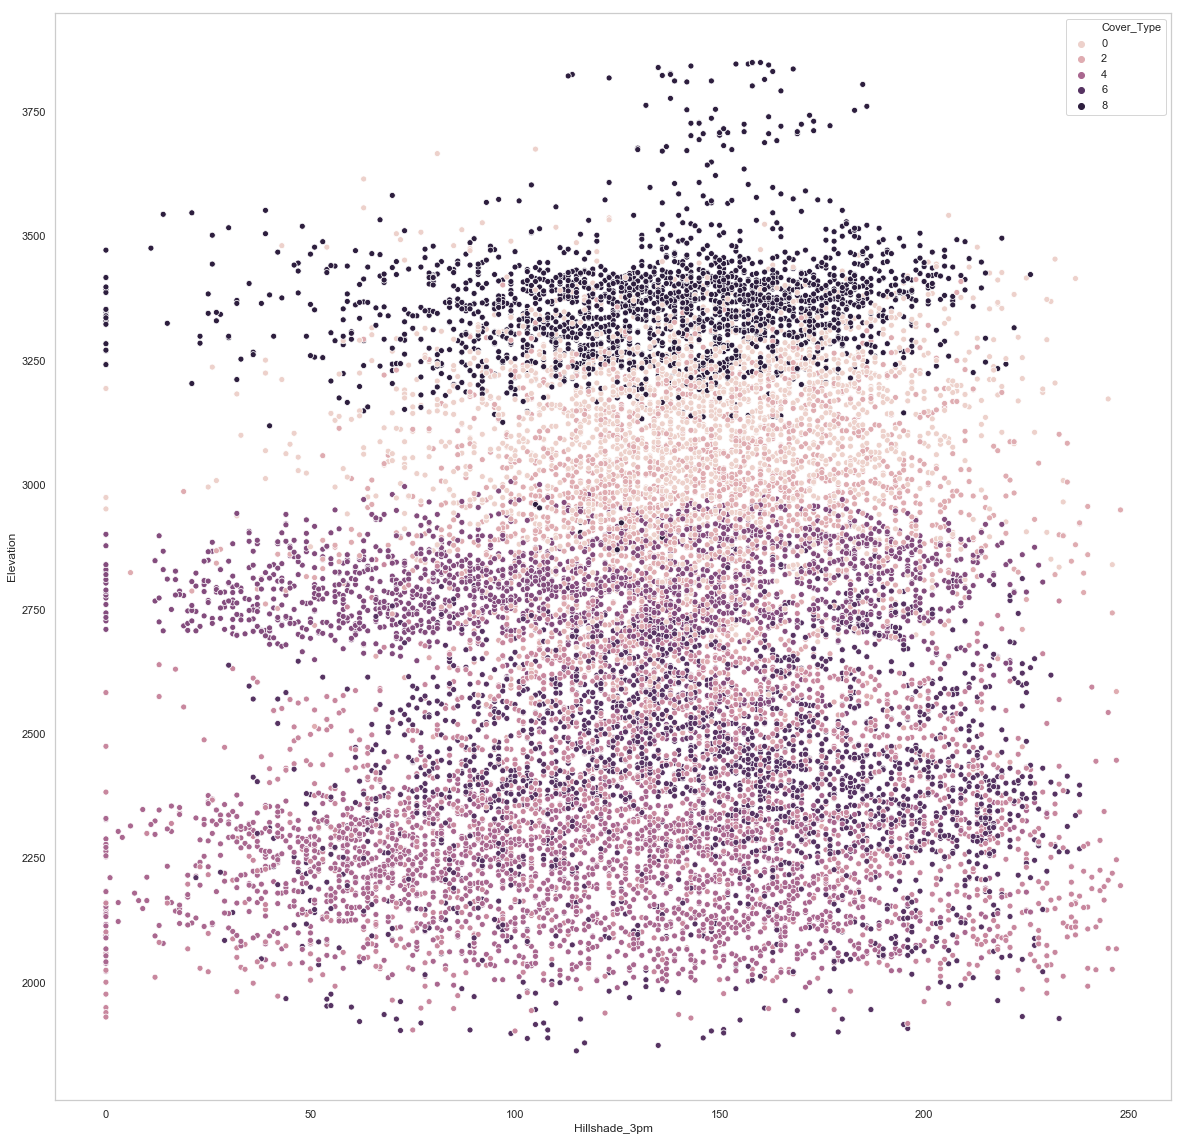

In [303]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=train, x='Hillshade_3pm', y='Elevation', hue='Cover_Type')

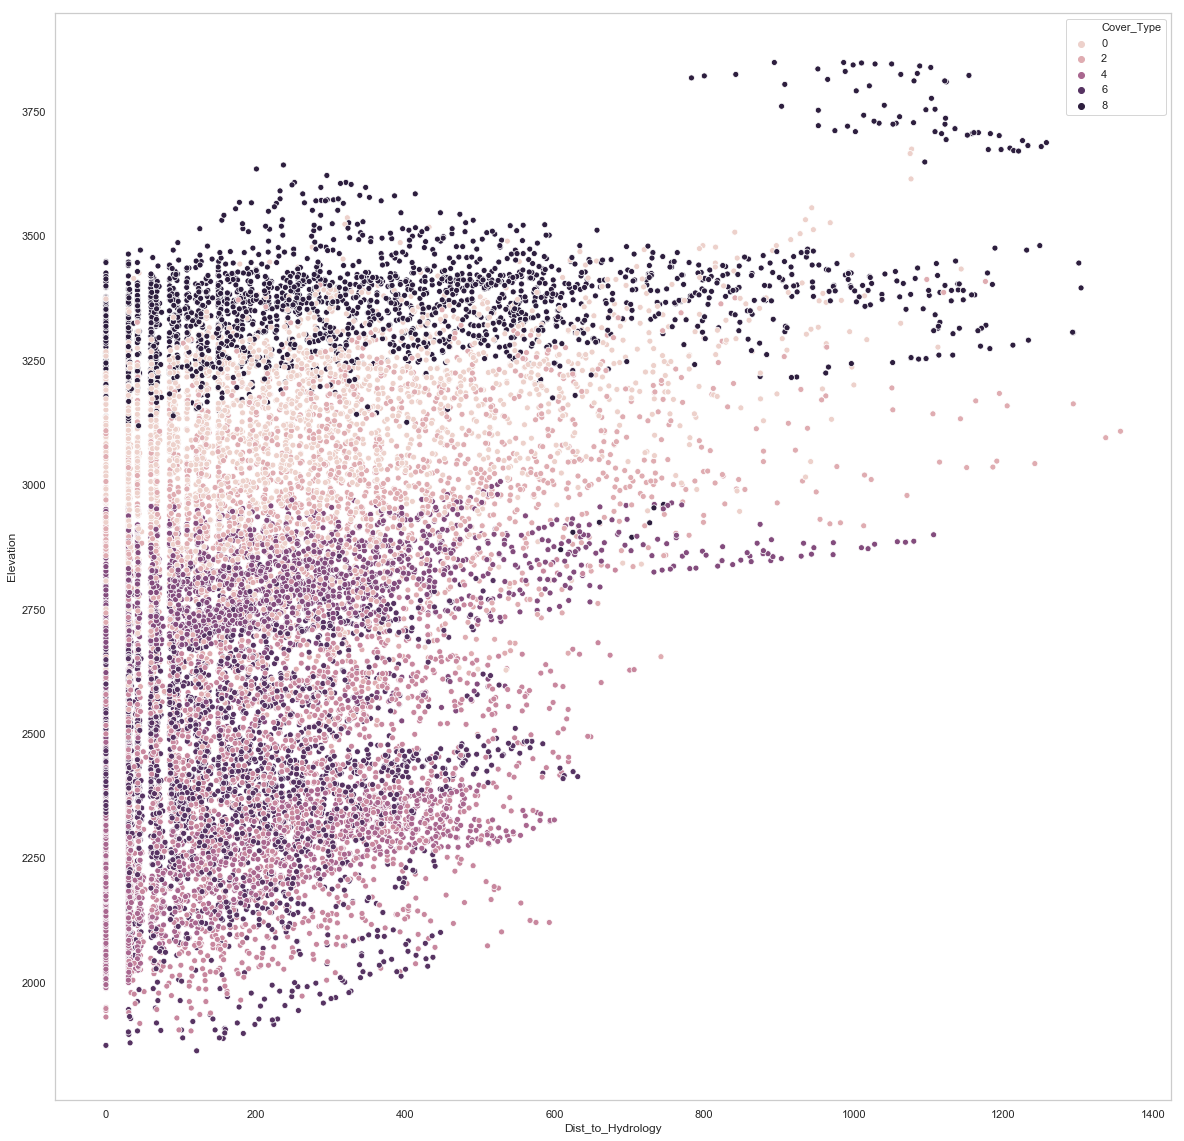

In [306]:
plt.figure(figsize=(20,20))
sns.scatterplot(data=train, x='Dist_to_Hydrology', y='Elevation', hue='Cover_Type')